In [92]:
# Provided Example
# I had this finished on time, but had an issue uploading it and noticed it wasn't up later. I wanted to make sure I told you before I uploaded this. Thank you.

In [79]:
# Burger's equation:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0  
xmax = +10.0   
Nx = 101     
tend = 10.0    
dtout = 1.0   

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

<IPython.core.display.Javascript object>


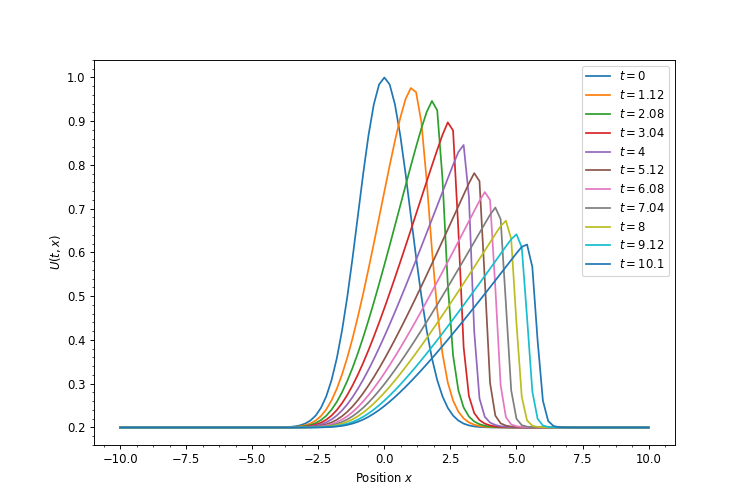

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007


<IPython.core.display.Javascript object>


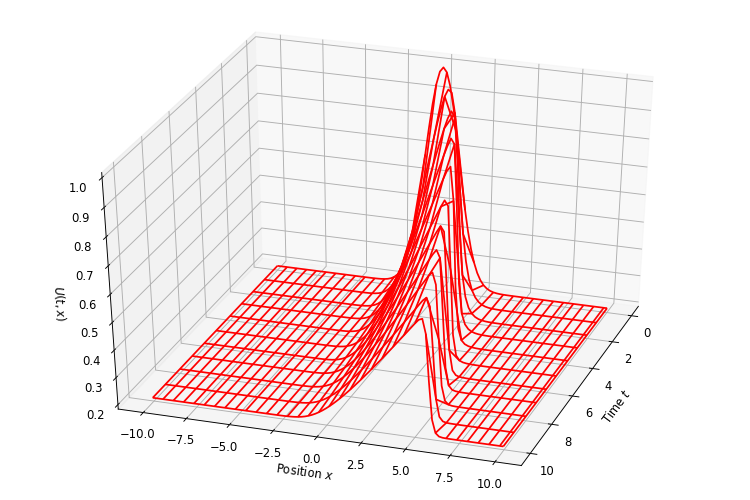

Done.


In [80]:
#Semi-Borrowed from lecture


tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    

   
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
            # Task: implement upwind method here.
        else:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            # Task: implement upwind method here.
            
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U) i OVO?
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Let's take a look at an example of what we have implemented previously in lectures, to get an idea of how to use the upwind method.

<IPython.core.display.Javascript object>


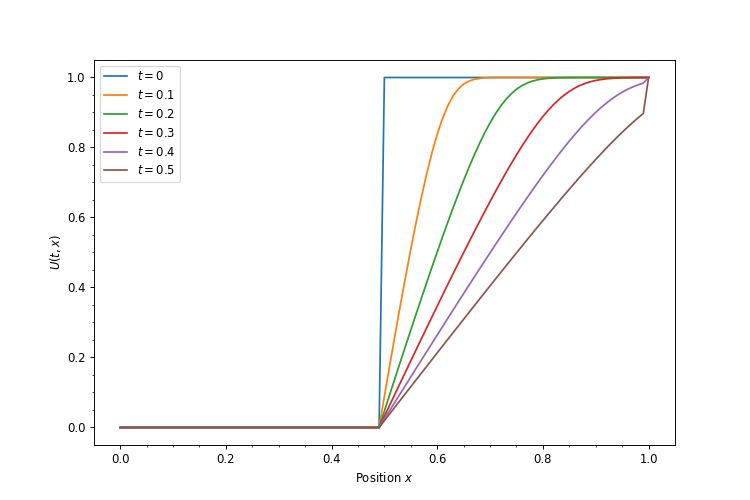

t =  0.10000000000000007
t =  0.20000000000000015
t =  0.3000000000000002
t =  0.4000000000000003
t =  0.5000000000000003


<IPython.core.display.Javascript object>


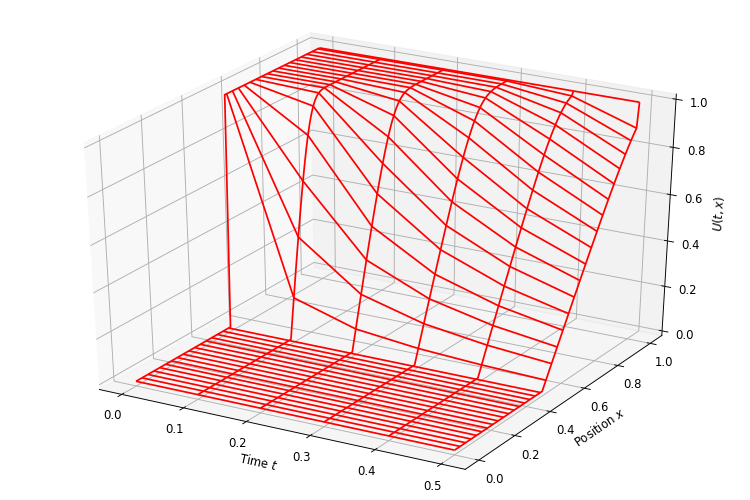

Done.


In [81]:
# Upwind method

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


vel = 1.0 
L = 1.0  
Nx = 101  
tend = 0.5  
dtout = 0.1  

x = np.linspace(0, L, Nx)
dx = L / (Nx - 1)
dt = 0.1 * dx / abs(vel)  # experiment with the size of the time step

t = 0.0
U = np.zeros(Nx,)
U[np.where(x < L/2)] = 0.0
U[np.where(x >= L/2)] = 1.0


tp = [t]
Up = np.copy(U)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()


tout = t + dtout
while t < tend:

    Uold = np.copy(U)
    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    

    if vel > 0:
        for ix in range(1, Nx - 1):
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx ### UNIQUE
    
            
    else:
        for ix in range(1, Nx - 1):
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx ###UNIQUE
            # Task: implement upwind method here.
            
    t += dt
    
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

I will be trying different grid sizes, different initial profiles, and the upwind method for experimentation.
Notice here the different intial profile, alhthough still wave like...

Let's use the template for the upwind method in order to analyze the effects of these various factors.
Let's start with a = 1 and larger ampltitude to exaggerate changes in the amplitude through this method and time evolution. 

<IPython.core.display.Javascript object>


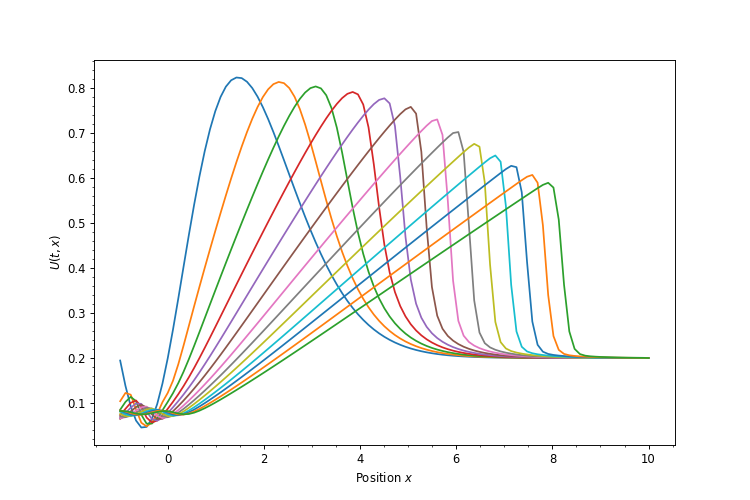

<IPython.core.display.Javascript object>


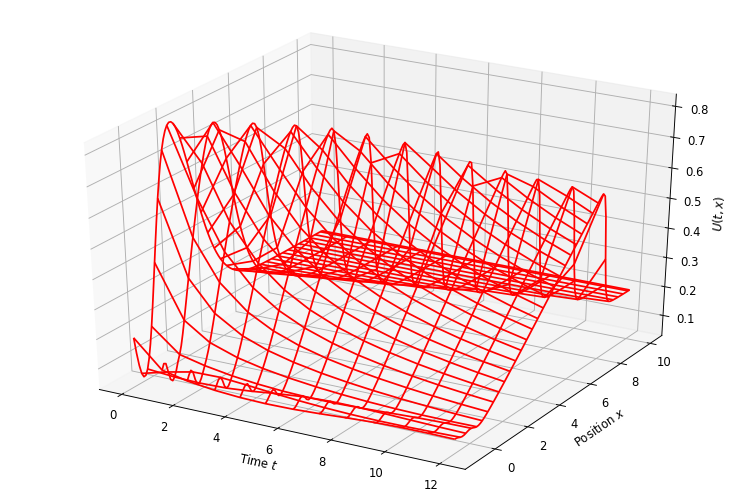

Done.


In [82]:
# Burger's equation:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
import scipy
from scipy.special import gamma, factorial

# Model Parameters
xmin = -0.99   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 12.0    # end time
dtout = 1.0   # time interval for outputs
a = 1

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)
#V = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
#U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
U = 0.2 + 1.5 * (a**(x+1) * np.exp(-a))/ (scipy.special.gamma(x))
#Semi-Borrowed

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)
#Vp = np.copy(V)
# Initiate the plot.
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    
#     U[0] = U[-2]
#     U[-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]
    Uold = np.copy(U)
    #Vold = np.copy(V)
    # Find the state at the next time step.
  
    #Implement U velocity where U is some function (gaussian)
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx

        else:
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, V, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U) i OVO?
        tp.append(t)
        Up = np.vstack((Up, U))
        #Vp = np.vstack((Vp, V))
        #print("t = ", t)
        tout += dtout

#ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
#zax3D.plot_wireframe(t, x, Vp.transpose(), color="green")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")


print("Done.")


plt.show()


Nothing too interesting, but we do notice the main amplitude gradually becoming skewed, and the minor amplitude seems to vary very slowly from its centering as it evolves. 

Let us try an "a" value smaller than 1 but larger than 0.

<IPython.core.display.Javascript object>


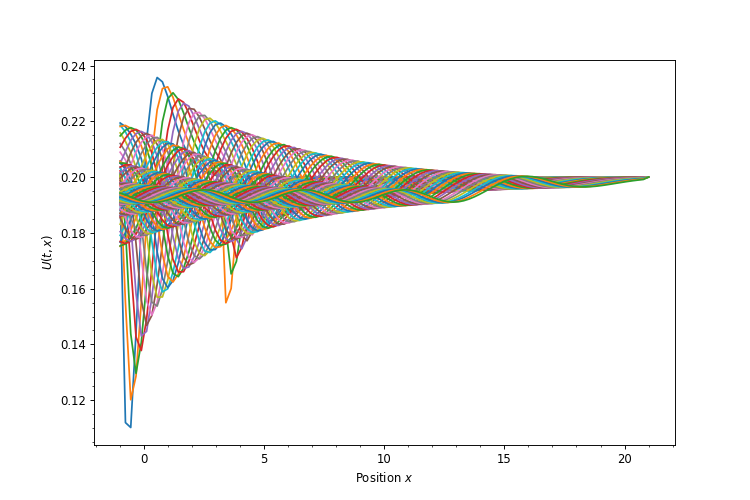

<IPython.core.display.Javascript object>


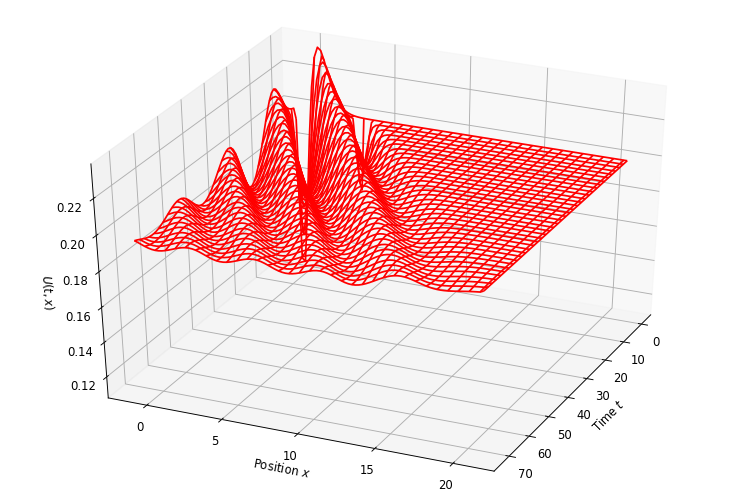

Done.


In [83]:
# Burger's equation:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
import scipy
from scipy.special import gamma, factorial

# Model Parameters
xmin = -0.99   # left boundary
xmax = +21.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 72.0    # end time
dtout = 1.0   # time interval for outputs
a = 0.21

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)
#V = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
#U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
U = 0.2 + 0.8 * (a**(x+1) * np.exp(-a))/ (scipy.special.gamma(x))
#Semi-Borrowed

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)
#Vp = np.copy(V)
# Initiate the plot.
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    
#     U[0] = U[-2]
#     U[-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]
    Uold = np.copy(U)
    #Vold = np.copy(V)
    # Find the state at the next time step.
  
    #Implement U velocity where U is some function (gaussian)
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx

        else:
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, V, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U) i OVO?
        tp.append(t)
        Up = np.vstack((Up, U))
        #Vp = np.vstack((Vp, V))
        #print("t = ", t)
        tout += dtout

#ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
#zax3D.plot_wireframe(t, x, Vp.transpose(), color="green")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")


print("Done.")

plt.show()


We see something interesting in the results of this previous simulation. There now exist very clear amplitude dips for the previously described "minor" part of the wave. This shows a slow decline for the major part and a distinct exponential type negative change in amplitude for the minor. I want to try Larger grid, in order to minimize any visual confounding due to the periodic boundary conditions. 


<IPython.core.display.Javascript object>


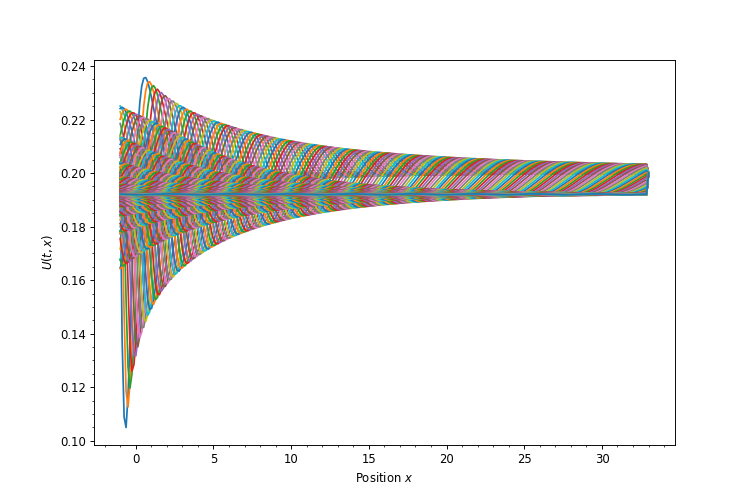

<IPython.core.display.Javascript object>


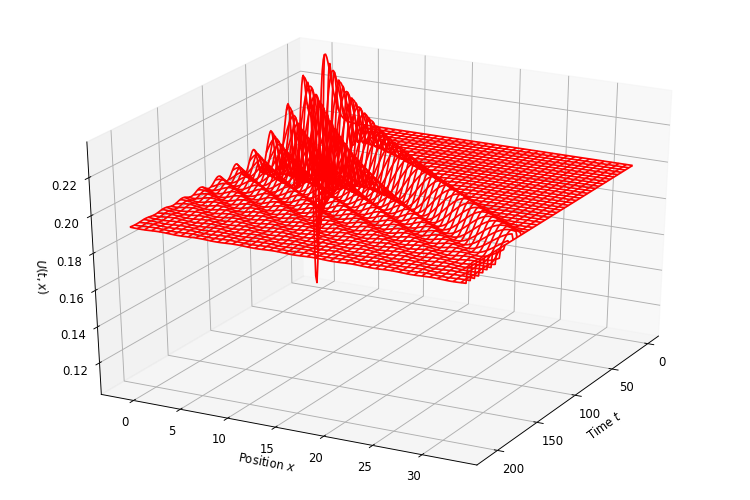

Done.


In [85]:
# Burger's equation:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
import scipy
from scipy.special import gamma, factorial

# Model Parameters
xmin = -1   # left boundary
xmax = +33.0   # right boundary
Nx = 270     # number of grid points (including boundary)
tend = 210.0    # end time
dtout = 1.0   # time interval for outputs
a = 0.21

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)
#V = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
#U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
U = 0.2 + 0.8 * (a**(x+1) * np.exp(-a))/ (scipy.special.gamma(x))
#Semi-Borrowed

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)
#Vp = np.copy(V)
# Initiate the plot.
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    

    Uold = np.copy(U)
    #Vold = np.copy(V)
    # Find the state at the next time step.
  
    #Implement U velocity where U is some function (gaussian)
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            #V[ix] = U[ix+1]/Uold[ix]
#             U[0] = U[-2]
#             U[-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]   
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx

        else:
#             U[0] = U[-2]
#             U[-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]   
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
#     U[0] = U[-2]
#     U[-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]       

    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, V, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U) i OVO?
        tp.append(t)
        Up = np.vstack((Up, U))
        #Vp = np.vstack((Vp, V))
        #print("t = ", t)
        tout += dtout

#ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
#zax3D.plot_wireframe(t, x, Vp.transpose(), color="green")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")


print("Done.")

Let us try this new Poisson-shape profile, with an "a" value larger than 1. We will allow the simulation to follow for a long period of time in order to exaggerate differences just as before. 

<IPython.core.display.Javascript object>


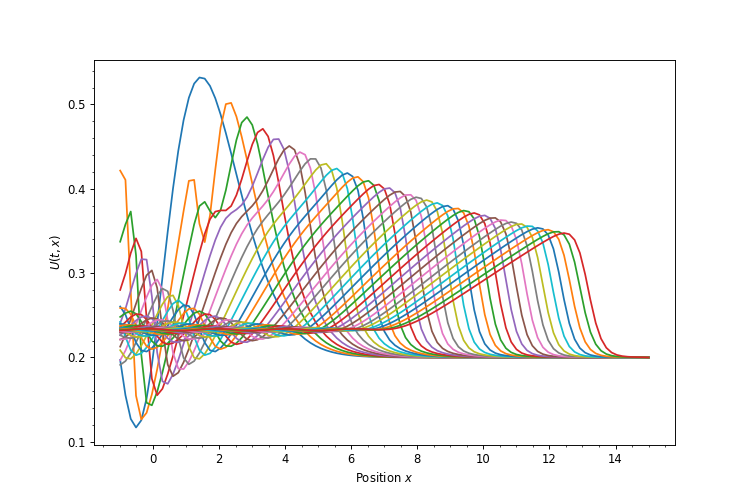

<IPython.core.display.Javascript object>


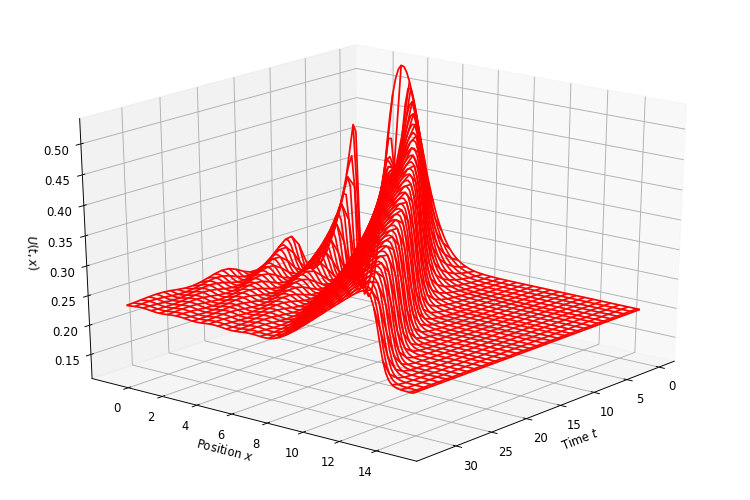

Done.


In [88]:
# Burger's equation:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
import scipy
from scipy.special import gamma, factorial

# Model Parameters
xmin = -0.99   # left boundary
xmax = +15.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 33.0    # end time
dtout = 1.0   # time interval for outputs
a = 1

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)
#V = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
#U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
U = 0.2 + 0.8 * (a**(x+1) * np.exp(-a))/ (scipy.special.gamma(x))
#Semi-Borrowed

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)
#Vp = np.copy(V)
# Initiate the plot.
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]    
#     U[0] = U[-2]
#     U[-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]
    Uold = np.copy(U)
    #Vold = np.copy(V)
    # Find the state at the next time step.
  
    #Implement U velocity where U is some function (gaussian)
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx

        else:
            #V[ix] = U[ix+1]/Uold[ix]
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, V, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U) i OVO?
        tp.append(t)
        Up = np.vstack((Up, U))
        #Vp = np.vstack((Vp, V))
        #print("t = ", t)
        tout += dtout

#ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
#zax3D.plot_wireframe(t, x, Vp.transpose(), color="green")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")


print("Done.")

plt.show()


We see here roguhly a linear drop off in amplitude, with a clear parallel following dip, which seems to follow different behavior compared to the main amplitude. 

Now,  I want to look at the change of the amplitude of this wave. Let's look at how the wave decays over time. 

<IPython.core.display.Javascript object>


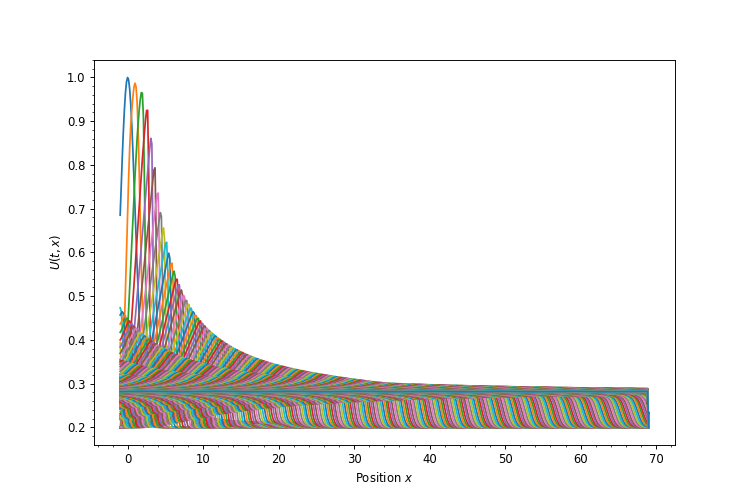

<IPython.core.display.Javascript object>


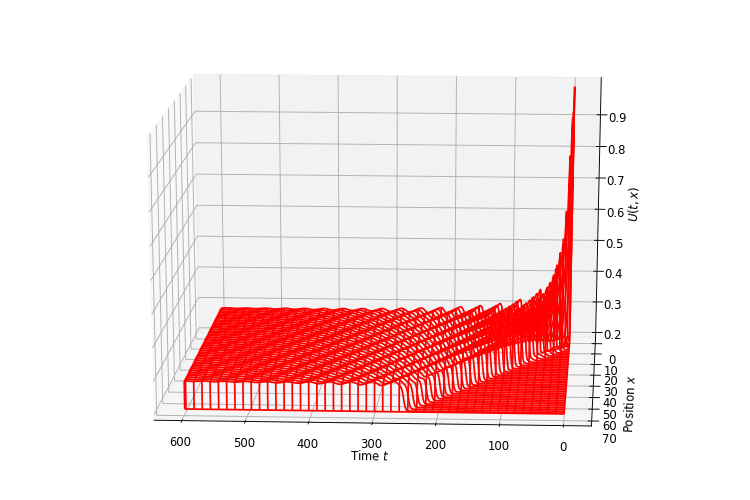

Done.


In [91]:
xmin = -1.0  
xmax = +69.0 
Nx = 501      
tend = 600.0    
dtout = 1.0  
# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = 1.0*(xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)
#V = np.zeros(Nx,)


t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
#Semi-Borrowed

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.

    U[0] = U[int(xmax)-2]
    U[int(xmax)-1] = U[1] # Last term is U[-1] compared to relative left most term, U[1]        

#     U[0] = U[-2]
#     U[-1] = U[1]
    Uold = np.copy(U)
    # Find the state at the next time step.
  
 
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
            #V[ix] = U[ix+1]/Uold[ix]
        else:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            #V[ix] = U[ix]/Uold[ix]
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U) i OVO?
        tp.append(t)
        Up = np.vstack((Up, U))
        #print("t = ", t)
        tout += dtout


# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(9,6))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")


print("Done.")

plt.show()


This is more interesting for the higher multi-dimensional plot than the cluttered 2 dimensional one. It is easy to see that the maximum amplitudes are clustered into very clear sections. Keep in mind we have periodic boundary conditions. This shows the exponnential decay of the amplitude of th wave along the motion, with the largest drop off begin right from the inital profile. The wave decays immediately from the initial profile to some wave which holds its shape throughout the propagation. 